<a href="https://colab.research.google.com/github/linndemberg1/Computer-vision/blob/main/Trab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mapa de Disparidade

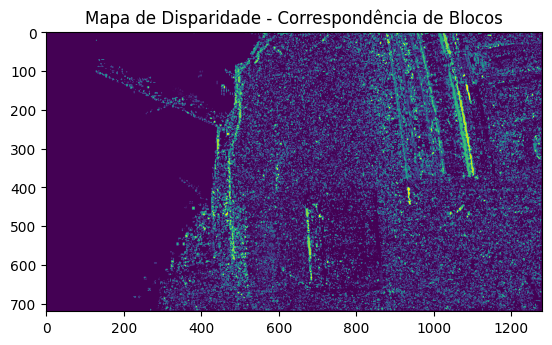

In [5]:
import cv2  # Biblioteca para processamento de imagens e visão computacional
import numpy as np  # Biblioteca para operações numéricas e manipulação de arrays
import matplotlib.pyplot as plt  # Biblioteca para visualização gráfica

# Carregar as imagens em escala de cinza
img_left = cv2.imread('/content/imgs/esquerdo.png', cv2.IMREAD_GRAYSCALE)  # Imagem do lado esquerdo
img_right = cv2.imread('/content/imgs/direito.png', cv2.IMREAD_GRAYSCALE)  # Imagem do lado direito

# Verificar e corrigir o tamanho das imagens
if img_left.shape != img_right.shape:
    # Redimensionar a imagem direita para ter o mesmo tamanho que a imagem esquerda
    img_right = cv2.resize(img_right, (img_left.shape[1], img_left.shape[0]))

# Configurações para a correspondência de blocos estéreo
block_size = 5  # Tamanho da janela do bloco. Deve ser ímpar e define o tamanho da região de correspondência.
min_disp = 0    # Valor mínimo de disparidade possível
num_disp = 128  # Diferença máxima entre a disparidade mínima e a máxima

# Criar o objeto StereoBM para correspondência de blocos
stereo = cv2.StereoBM_create(numDisparities=num_disp, blockSize=block_size)

# Calcular o mapa de disparidade entre as imagens esquerda e direita
disparity = stereo.compute(img_left, img_right)

# Normalizar o mapa de disparidade para visualização
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)  # Ajusta os valores para o intervalo de 0 a 255
disparity = np.uint8(disparity)  # Converter para formato de imagem de 8 bits

# Exibir o mapa de disparidade usando matplotlib
plt.imshow(disparity, cmap='viridis')  # Exibe a imagem com o colormap 'viridis'
plt.title('Mapa de Disparidade - Correspondência de Blocos')  # Título do gráfico
plt.show()  # Mostra o gráfico



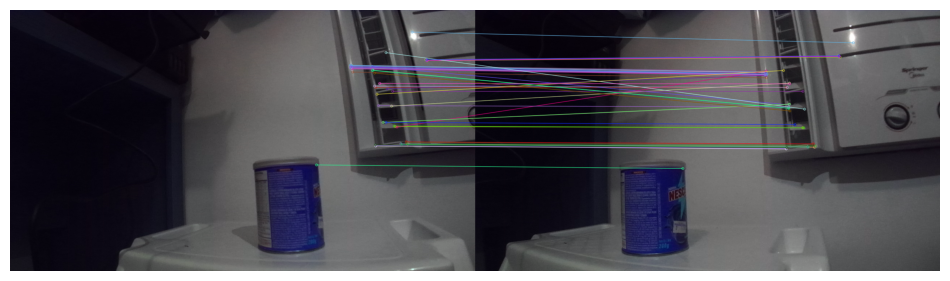

In [7]:
import cv2  # Biblioteca para processamento de imagens e visão computacional
from matplotlib import pyplot as plt  # Biblioteca para visualização gráfica

# Carregar as imagens esquerda e direita
img_left = cv2.imread('/content/imgs/esquerdo.png')  # Imagem da esquerda
img_right = cv2.imread('/content/imgs/direito.png')  # Imagem da direita

# Converter as imagens para escala de cinza
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)  # Imagem esquerda em escala de cinza
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)  # Imagem direita em escala de cinza

# Criar o detector de características ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()

# Detectar pontos-chave e calcular descritores para as duas imagens
keypoints_left, descriptors_left = orb.detectAndCompute(gray_left, None)  # Pontos e descritores da imagem esquerda
keypoints_right, descriptors_right = orb.detectAndCompute(gray_right, None)  # Pontos e descritores da imagem direita

# Criar o objeto BFMatcher para corresponder descritores usando a norma de Hamming
# crossCheck=True assegura que apenas correspondências bidirecionais sejam consideradas
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar correspondências entre os descritores das duas imagens
matches = bf.match(descriptors_left, descriptors_right)

# Ordenar as correspondências com base na distância (quanto menor, melhor a correspondência)
matches = sorted(matches, key=lambda x: x.distance)

# Desenhar as correspondências entre as imagens
img_matches = cv2.drawMatches(
    img_left, keypoints_left,   # Imagem da esquerda e seus pontos-chave
    img_right, keypoints_right,  # Imagem da direita e seus pontos-chave
    matches[:50],  # Selecionar as 50 melhores correspondências
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS  # Não desenhar pontos que não têm correspondências
)

# Exibir a imagem com correspondências usando matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)  # Mostrar a imagem com as correspondências
plt.axis('off')  # Remover os eixos
plt.show()  # Exibir a imagem
